In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
folder_name = 'Data'

In [3]:
documents = []
file_names = []

In [4]:
for file_name in os.listdir(folder_name):
    if file_name.endswith('.txt'):
        with open(os.path.join(folder_name, file_name), 'r', encoding='utf-8') as file:
            documents.append(file.read())
            file_names.append(file_name)

In [5]:
vectorizer = CountVectorizer(stop_words='english')
term_document_matrix = vectorizer.fit_transform(documents)

In [6]:
df = pd.DataFrame(term_document_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=file_names)

In [7]:
def visualize_pca(term_document_matrix, file_names):
    pca = PCA(n_components=2)
    reduced_matrix = pca.fit_transform(term_document_matrix.toarray())

    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], color='blue')

    for i, name in enumerate(file_names):
        plt.text(reduced_matrix[i, 0], reduced_matrix[i, 1], name.split(' ')[0], fontsize=8)

    plt.title('PCA of term document matrix')
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt.show()

In [8]:
def visualize_tsne(term_document_matrix, file_names):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_matrix = tsne.fit_transform(term_document_matrix.toarray())

    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], color='green')

    for i, name in enumerate(file_names):
        plt.text(reduced_matrix[i, 0], reduced_matrix[i, 1], name.split(' ')[0], fontsize=8)

    plt.title('t-SNE of term document matrix')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.show()

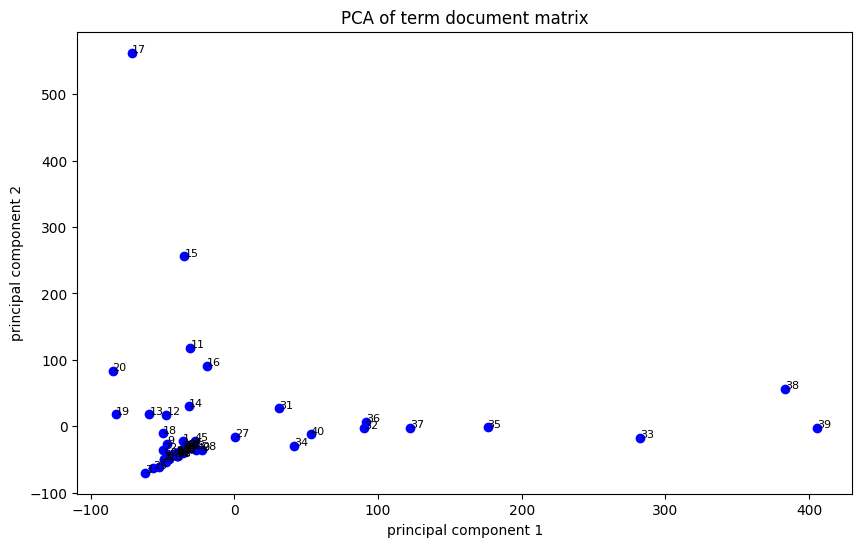

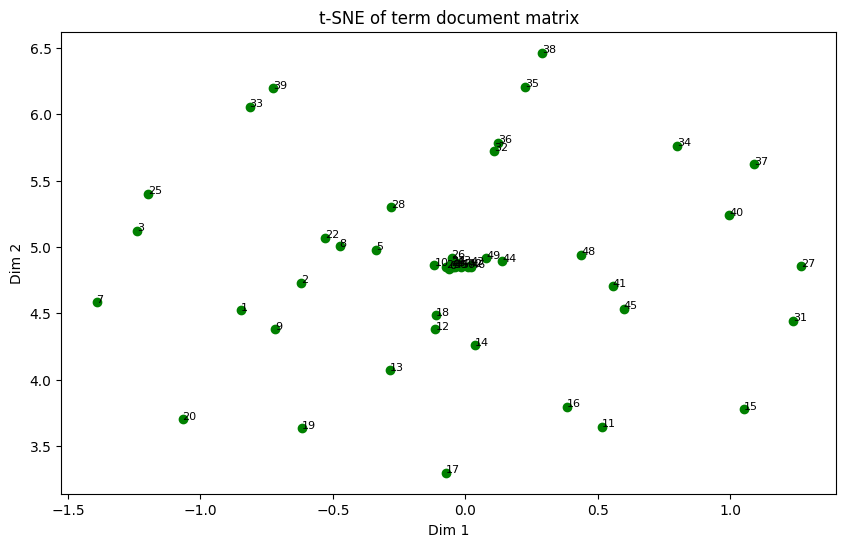

In [9]:
visualize_pca(term_document_matrix, file_names)
visualize_tsne(term_document_matrix, file_names)